In [2]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tpot.builtins import StackingEstimator
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.feature_selection import SelectPercentile, VarianceThreshold, f_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline, make_union
from sklearn.svm import LinearSVR
from tpot.builtins import StackingEstimator
import pandas as pd
import numpy as np

def initaliseModel():
    dataset = pd.read_csv('../../Data/CurrentDataset.csv')
    dataset['wgust'].replace(np.NaN, 0, inplace=True)
    dataset = dataset.dropna().drop('Unnamed: 0',axis=1)
    dataset = dataset[dataset['loadFactor']<=1]
    y = dataset['loadFactor']
    X = dataset.drop('BMUID',axis=1).drop('loadFactor',axis=1)
    training_features, testing_features, training_target, testing_target = \
                train_test_split(X, y, random_state=1)
    predictor_pipeline = make_pipeline(
        StackingEstimator(estimator=ExtraTreesRegressor(bootstrap=False, max_features=0.55, min_samples_leaf=1, min_samples_split=5, n_estimators=100)),
        StackingEstimator(estimator=ExtraTreesRegressor(bootstrap=False, max_features=0.55, min_samples_leaf=9, min_samples_split=8, n_estimators=100)),
        VarianceThreshold(threshold=0.01),
        StackingEstimator(estimator=AdaBoostRegressor(learning_rate=0.001, loss="linear", n_estimators=100)),
        SelectPercentile(score_func=f_regression, percentile=28),
        StackingEstimator(estimator=LinearSVR(C=0.5, dual=False, epsilon=0.0001, loss="squared_epsilon_insensitive", tol=0.01)),
        StackingEstimator(estimator=GradientBoostingRegressor(alpha=0.95, learning_rate=0.01, loss="lad", max_depth=7, max_features=1.0, min_samples_leaf=9, min_samples_split=10, n_estimators=100, subsample=0.5)),
        StackingEstimator(estimator=LinearSVR(C=20.0, dual=True, epsilon=0.001, loss="epsilon_insensitive", tol=1e-05)),
        KNeighborsRegressor(n_neighbors=61, p=2, weights="distance")
    )
    predictor_pipeline.fit(training_features, training_target)
    return predictor_pipeline

def predict(input,model):
    return(model.predict(input))



C:\Users\james\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
C:\Users\james\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


0.5193034656243465 0.17672429078176613


C:\Users\james\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\james\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


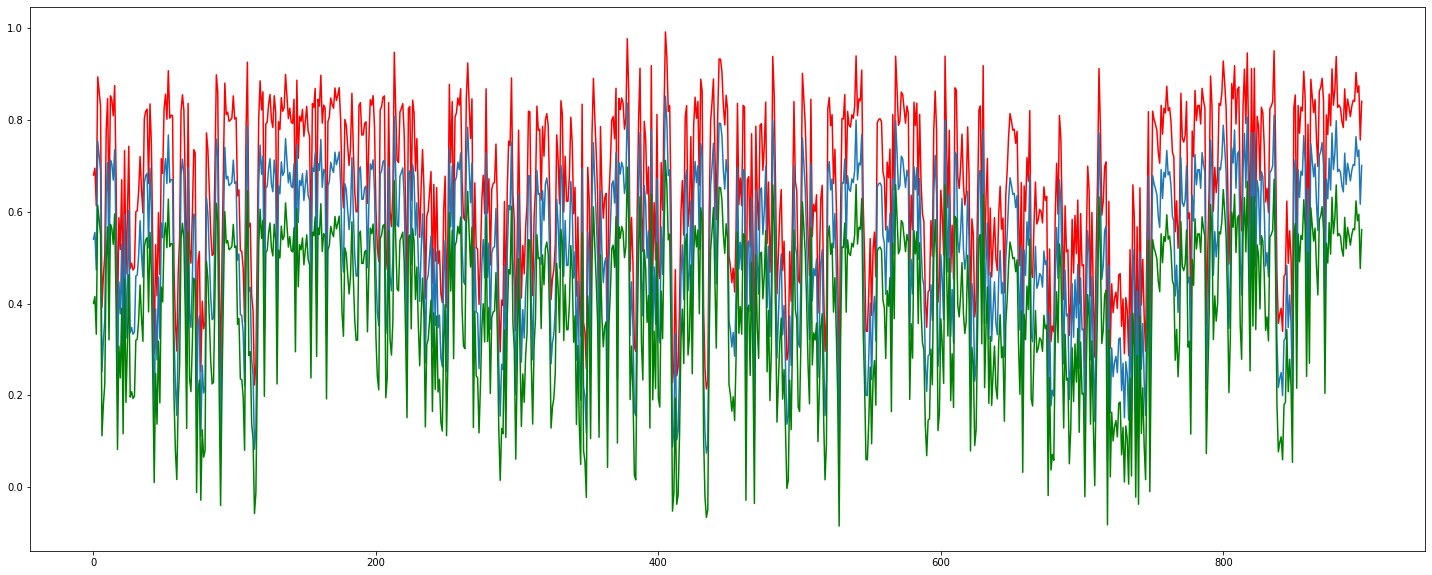

In [18]:
model = initaliseModel()

longTermLocationData = pd.read_csv('../../Data/TimeSeriesOfLocations/57.23963580566568_-4.695464890442125.csv')
#Reformat data to be consistent with training data:

d = {'temp': longTermLocationData['temp'], 'wspd': longTermLocationData['windspeed'],'wgust': longTermLocationData['windgust'],'sealevelpressure': longTermLocationData['pressure'],'visibility': longTermLocationData['visibility'],'cloudcover': longTermLocationData['cloudcover'],'precip': longTermLocationData['precip'],'dew': longTermLocationData['dew'],'humidity': longTermLocationData['humidity']}
inputData = pd.DataFrame(data=d)
inputData.replace('', np.NaN, inplace=True)
inputData['wgust'].replace(np.NaN, 0, inplace=True)
inputData = inputData.dropna()
predictions = predict(inputData,model)
print(predictions.mean(),predictions.std())
from matplotlib import pyplot as plt
plt.figure(figsize=(25,10))
plt.plot(predictions+0.14,color='red')
plt.plot(predictions)
plt.plot(predictions-0.14,color='green')


In [10]:
df =pd.read_csv('../../Data/locations.csv').drop('capacity',axis=1)
print()
print(df.iloc[0])



BMU_ID                    ABRTW-1
name         Auchrobert Wind Farm
latitude                55.610557
longitude               -4.015385
Name: 0, dtype: object
